# Importamos librerías

In [1]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

# Importamos los datos

In [1]:
path = '../../../Base de datos/Trayectorias 100 eval'

## Datos de entrenamiento

### Datos

In [5]:
varftrain = np.load(path + '/varftrain.npy')

In [6]:
np.shape(varftrain)

(7000, 10, 2, 100)

### Coeficientes

In [7]:
coefvarftrain = np.load(path + '/coefvarftrain.npy')

In [8]:
np.shape(coefvarftrain)

(7000, 7)

## Datos de prueba

### Datos

In [9]:
varftest = np.load(path + '/varftest.npy')

In [10]:
np.shape(varftest)

(2000, 10, 2, 100)

### Coeficientes

In [11]:
coefvarftest = np.load(path + '/coefvarftest.npy')

In [12]:
np.shape(coefvarftest)

(2000, 7)

## Datos de validación

### Datos

In [13]:
varfval = np.load(path + '/varfval.npy')

In [14]:
np.shape(varfval)

(1000, 10, 2, 100)

### Coeficienes

In [15]:
coefvarfval = np.load(path + '/coefvarfval.npy')

In [16]:
np.shape(coefvarfval)

(1000, 7)

# Unimos coeficientes con los datos

In [17]:
train_dataset = tf.data.Dataset.from_tensor_slices((varftrain, coefvarftrain))
test_dataset = tf.data.Dataset.from_tensor_slices((varftest, coefvarftest))
val_dataset = tf.data.Dataset.from_tensor_slices((varfval, coefvarfval))

In [18]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(10, 2, 100), dtype=tf.float64, name=None), TensorSpec(shape=(7,), dtype=tf.int32, name=None))>

# Mezclar y procesar por lotes los conjuntos de datos

In [19]:
BATCH_SIZE = 100
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)

# Creación del modelo

In [31]:
#model = Sequential()

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(10,2,100)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(7)
])


In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2000)              0         
                                                                 
 batch_normalization_2 (Batc  (None, 2000)             8000      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 128)               256128    
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                      

# Entrenamos el modelo

In [33]:
model.compile(optimizer='adam',
              loss='MSE',
              metrics=['mae'])

In [34]:
def scheduler(epoch, lr):
  if epoch < 100:
    return lr
  else:
    return 1e-3 * 0.99 ** epoch

In [35]:
val_epochs = 507
tf.compat.v1.global_variables_initializer()

early_stop = tf.keras.callbacks.EarlyStopping( monitor = 'val_loss', patience = 500,verbose = 1, 
                                              restore_best_weights = True)

reduce_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(train_dataset, validation_data=val_dataset, epochs= val_epochs, callbacks=[reduce_lr, early_stop])

Epoch 1/507
70/70 [==============================] - 1s 7ms/step - loss: 28.2283 - mae: 4.5229 - val_loss: 26.4697 - val_mae: 4.3128 - lr: 0.0010
Epoch 2/507
70/70 [==============================] - 0s 6ms/step - loss: 21.2514 - mae: 3.8663 - val_loss: 15.2427 - val_mae: 3.2122 - lr: 0.0010
Epoch 3/507
70/70 [==============================] - 0s 6ms/step - loss: 12.2073 - mae: 2.8236 - val_loss: 8.2379 - val_mae: 2.3408 - lr: 0.0010
Epoch 4/507
70/70 [==============================] - 0s 6ms/step - loss: 7.7316 - mae: 2.2336 - val_loss: 6.3058 - val_mae: 2.0421 - lr: 0.0010
Epoch 5/507
70/70 [==============================] - 0s 6ms/step - loss: 6.8218 - mae: 2.1042 - val_loss: 6.5475 - val_mae: 2.0716 - lr: 0.0010
Epoch 6/507
70/70 [==============================] - 0s 6ms/step - loss: 6.7050 - mae: 2.0852 - val_loss: 6.5075 - val_mae: 2.0784 - lr: 0.0010
Epoch 7/507
70/70 [==============================] - 0s 6ms/step - loss: 6.4623 - mae: 2.0402 - val_loss: 6.1180 - val_mae: 1.9946 

70/70 [==============================] - 0s 6ms/step - loss: 4.4251 - mae: 1.6085 - val_loss: 4.2744 - val_mae: 1.5390 - lr: 3.2445e-04
Epoch 114/507
70/70 [==============================] - 0s 6ms/step - loss: 4.3767 - mae: 1.5999 - val_loss: 4.2988 - val_mae: 1.5453 - lr: 3.2120e-04
Epoch 115/507
70/70 [==============================] - 0s 6ms/step - loss: 4.3830 - mae: 1.5996 - val_loss: 4.2750 - val_mae: 1.5380 - lr: 3.1799e-04
Epoch 116/507
70/70 [==============================] - 0s 6ms/step - loss: 4.3564 - mae: 1.5920 - val_loss: 4.2759 - val_mae: 1.5367 - lr: 3.1481e-04
Epoch 117/507
70/70 [==============================] - 0s 6ms/step - loss: 4.3705 - mae: 1.5966 - val_loss: 4.3033 - val_mae: 1.5472 - lr: 3.1166e-04
Epoch 118/507
70/70 [==============================] - 0s 6ms/step - loss: 4.3401 - mae: 1.5923 - val_loss: 4.2656 - val_mae: 1.5412 - lr: 3.0854e-04
Epoch 119/507
70/70 [==============================] - 0s 6ms/step - loss: 4.3683 - mae: 1.5956 - val_loss: 4.2900

Epoch 168/507
70/70 [==============================] - 0s 6ms/step - loss: 4.1957 - mae: 1.5577 - val_loss: 4.2406 - val_mae: 1.5186 - lr: 1.8667e-04
Epoch 169/507
70/70 [==============================] - 0s 6ms/step - loss: 4.2198 - mae: 1.5665 - val_loss: 4.2668 - val_mae: 1.5228 - lr: 1.8480e-04
Epoch 170/507
70/70 [==============================] - 0s 6ms/step - loss: 4.2090 - mae: 1.5631 - val_loss: 4.2645 - val_mae: 1.5253 - lr: 1.8296e-04
Epoch 171/507
70/70 [==============================] - 0s 6ms/step - loss: 4.1600 - mae: 1.5519 - val_loss: 4.2251 - val_mae: 1.5144 - lr: 1.8113e-04
Epoch 172/507
70/70 [==============================] - 0s 6ms/step - loss: 4.2273 - mae: 1.5646 - val_loss: 4.2591 - val_mae: 1.5240 - lr: 1.7932e-04
Epoch 173/507
70/70 [==============================] - 0s 6ms/step - loss: 4.2003 - mae: 1.5621 - val_loss: 4.2416 - val_mae: 1.5186 - lr: 1.7752e-04
Epoch 174/507
70/70 [==============================] - 0s 6ms/step - loss: 4.1980 - mae: 1.5608 - va

Epoch 223/507
70/70 [==============================] - 0s 6ms/step - loss: 4.0976 - mae: 1.5400 - val_loss: 4.2711 - val_mae: 1.5139 - lr: 1.0740e-04
Epoch 224/507
70/70 [==============================] - 0s 6ms/step - loss: 4.0750 - mae: 1.5357 - val_loss: 4.2622 - val_mae: 1.5090 - lr: 1.0633e-04
Epoch 225/507
70/70 [==============================] - 0s 6ms/step - loss: 4.0921 - mae: 1.5383 - val_loss: 4.2611 - val_mae: 1.5099 - lr: 1.0526e-04
Epoch 226/507
70/70 [==============================] - 0s 6ms/step - loss: 4.0771 - mae: 1.5363 - val_loss: 4.2798 - val_mae: 1.5108 - lr: 1.0421e-04
Epoch 227/507
70/70 [==============================] - 0s 6ms/step - loss: 4.0573 - mae: 1.5312 - val_loss: 4.2654 - val_mae: 1.5101 - lr: 1.0317e-04
Epoch 228/507
70/70 [==============================] - 0s 6ms/step - loss: 4.0889 - mae: 1.5398 - val_loss: 4.2780 - val_mae: 1.5140 - lr: 1.0214e-04
Epoch 229/507
70/70 [==============================] - 0s 6ms/step - loss: 4.0624 - mae: 1.5319 - va

Epoch 278/507
70/70 [==============================] - 0s 6ms/step - loss: 4.0366 - mae: 1.5278 - val_loss: 4.2991 - val_mae: 1.5159 - lr: 6.1794e-05
Epoch 279/507
70/70 [==============================] - 0s 6ms/step - loss: 4.0543 - mae: 1.5342 - val_loss: 4.3043 - val_mae: 1.5157 - lr: 6.1176e-05
Epoch 280/507
70/70 [==============================] - 0s 6ms/step - loss: 4.0153 - mae: 1.5229 - val_loss: 4.3048 - val_mae: 1.5139 - lr: 6.0565e-05
Epoch 281/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9969 - mae: 1.5160 - val_loss: 4.2940 - val_mae: 1.5151 - lr: 5.9959e-05
Epoch 282/507
70/70 [==============================] - 0s 6ms/step - loss: 4.0419 - mae: 1.5325 - val_loss: 4.3023 - val_mae: 1.5135 - lr: 5.9359e-05
Epoch 283/507
70/70 [==============================] - 0s 6ms/step - loss: 4.0429 - mae: 1.5293 - val_loss: 4.2967 - val_mae: 1.5119 - lr: 5.8766e-05
Epoch 284/507
70/70 [==============================] - 0s 6ms/step - loss: 4.0044 - mae: 1.5203 - va

Epoch 333/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9690 - mae: 1.5138 - val_loss: 4.3139 - val_mae: 1.5132 - lr: 3.5554e-05
Epoch 334/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9576 - mae: 1.5093 - val_loss: 4.3141 - val_mae: 1.5135 - lr: 3.5198e-05
Epoch 335/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9635 - mae: 1.5129 - val_loss: 4.3226 - val_mae: 1.5149 - lr: 3.4846e-05
Epoch 336/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9511 - mae: 1.5101 - val_loss: 4.3138 - val_mae: 1.5120 - lr: 3.4498e-05
Epoch 337/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9346 - mae: 1.5042 - val_loss: 4.3114 - val_mae: 1.5127 - lr: 3.4153e-05
Epoch 338/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9369 - mae: 1.5054 - val_loss: 4.3034 - val_mae: 1.5094 - lr: 3.3811e-05
Epoch 339/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9526 - mae: 1.5112 - va

Epoch 388/507
70/70 [==============================] - 0s 7ms/step - loss: 3.9315 - mae: 1.5060 - val_loss: 4.3135 - val_mae: 1.5128 - lr: 2.0456e-05
Epoch 389/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9553 - mae: 1.5126 - val_loss: 4.3173 - val_mae: 1.5128 - lr: 2.0251e-05
Epoch 390/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9057 - mae: 1.4992 - val_loss: 4.3152 - val_mae: 1.5124 - lr: 2.0049e-05
Epoch 391/507
70/70 [==============================] - 0s 6ms/step - loss: 3.8879 - mae: 1.4940 - val_loss: 4.3157 - val_mae: 1.5129 - lr: 1.9848e-05
Epoch 392/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9534 - mae: 1.5108 - val_loss: 4.3086 - val_mae: 1.5097 - lr: 1.9650e-05
Epoch 393/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9434 - mae: 1.5063 - val_loss: 4.3051 - val_mae: 1.5101 - lr: 1.9453e-05
Epoch 394/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9494 - mae: 1.5089 - va

Epoch 443/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9345 - mae: 1.5036 - val_loss: 4.3213 - val_mae: 1.5116 - lr: 1.1769e-05
Epoch 444/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9102 - mae: 1.5021 - val_loss: 4.3172 - val_mae: 1.5112 - lr: 1.1652e-05
Epoch 445/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9234 - mae: 1.5020 - val_loss: 4.3113 - val_mae: 1.5100 - lr: 1.1535e-05
Epoch 446/507
70/70 [==============================] - 0s 6ms/step - loss: 3.8931 - mae: 1.4969 - val_loss: 4.3135 - val_mae: 1.5094 - lr: 1.1420e-05
Epoch 447/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9216 - mae: 1.5036 - val_loss: 4.3144 - val_mae: 1.5088 - lr: 1.1306e-05
Epoch 448/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9218 - mae: 1.5033 - val_loss: 4.3138 - val_mae: 1.5093 - lr: 1.1193e-05
Epoch 449/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9250 - mae: 1.5057 - va

Epoch 498/507
70/70 [==============================] - 0s 6ms/step - loss: 3.8916 - mae: 1.4979 - val_loss: 4.3139 - val_mae: 1.5094 - lr: 6.7716e-06
Epoch 499/507
70/70 [==============================] - 0s 6ms/step - loss: 3.8748 - mae: 1.4910 - val_loss: 4.3135 - val_mae: 1.5087 - lr: 6.7039e-06
Epoch 500/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9274 - mae: 1.5034 - val_loss: 4.3148 - val_mae: 1.5093 - lr: 6.6369e-06
Epoch 501/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9214 - mae: 1.5056 - val_loss: 4.3161 - val_mae: 1.5101 - lr: 6.5705e-06
Epoch 502/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9069 - mae: 1.5004 - val_loss: 4.3171 - val_mae: 1.5109 - lr: 6.5048e-06
Epoch 503/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9063 - mae: 1.5000 - val_loss: 4.3134 - val_mae: 1.5091 - lr: 6.4397e-06
Epoch 504/507
70/70 [==============================] - 0s 6ms/step - loss: 3.9260 - mae: 1.5036 - va

# Analizamos accuracy y loss

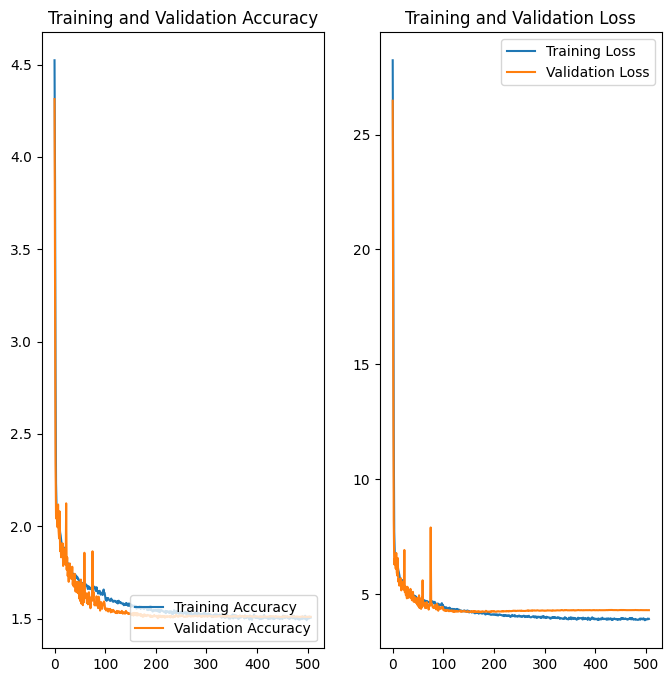

In [37]:
acc = history.history['mae']
val_acc = history.history['val_mae']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(507)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Guardamos los datos Accuracy y Loss

In [38]:
df = pd.DataFrame.from_dict(history.history)
df.to_csv('../../../Gráficas finales/historytrayec100.csv', index=False)

# Guardamos el modelo

In [1]:
path_to_save = '../../../Modelos/Modelos 50,100'

In [40]:
model.save(path_to_save + '/trayectorias100.h5')

# Importamos el modelo

In [41]:
new_model = keras.models.load_model('../../../Modelos/Modelos 50,100/trayectorias100.h5')

# Probamos el modelo con datos nuevos

## Creamos nuevos datos

In [42]:
import random
from scipy.integrate import solve_ivp

varf = []
coef = []
contador = 0
for i in range(0, 1):
    # constantes
    a1 = random.randint(0, 10)
    a2 = random.randint(0, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(0, 5)

    coef1 = [a1, a2, b1, b2, d1, d2, n]
    coef.append(coef1)

    def f(t, y):

        # asignar a cada ODE a un elemento de vector
        X = y[0]
        Y = y[1]

        # definimos cada ODE
        # dX_dt=a1/(1+Y**n)-d1*X+b1
        # dY_dt=a2/(1+X**n)-d2*Y+b2
        dX_dt = a1/(1+Y**n)-d1*X+b1
        dY_dt = a2/(1+X**n)-d2*Y+b1

        return [dX_dt, dY_dt]

    # Declaramos el vector de tiempo
    t_span = [0, 5]
    times = np.linspace(t_span[0], t_span[1], 100)

    varfci2 = []
    for i_ci in range(0, 10):
        # Definimos las condiciones iniciales
        y0 = np.array([random.randint(0, 10), random.randint(0, 10)])

        # Resolvemos
        # Modificar manualmente el intervalo de tiempo
        sol = solve_ivp(f, t_span, y0, t_eval=times)
        # sol=solve_ivp(f, t_span, y0) #Dejar que la librería elija el mejor intervalo
        tiempo = sol.t
        var1 = sol.y[0]
        var2 = sol.y[1]

        varfci = np.append([var1], [var2], axis=0)
        varfci2.append(varfci)

       

    varf= varfci2
    print('--------------------------------------------')
    print(coef1)
    print(np.shape(varf))
    contador = contador+1
    print(contador)

varf = np.array(varf)
coef = np.array(coef)

--------------------------------------------
[0, 1, 4, 8, 5, 1, 5]
(10, 2, 100)
1


In [43]:
varfnone = varf[None, :]

## Predecimos con los datos nuevos

In [44]:
new_predictions = new_model.predict(campvecnone)
new_predictions = np.round(new_predictions)
new_predictions = np.clip(new_predictions, 0, None)
print(new_predictions)

1/1 [==============================] - 0s 64ms/step
[[4.598486  4.9482164 4.841604  5.1468625 5.7165155 1.5674145 2.438352 ]]


## Graficamos con los coeficientes reales

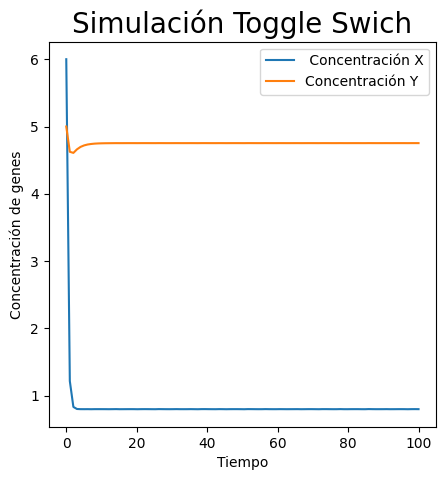

In [45]:
t_span = [0, 50]
times = np.linspace(t_span[0], t_span[1], 100)
plt.figure(figsize=(5,5))
plt.plot(times,np.array(varf)[0,0,:], label=" Concentración X")
plt.plot(times,np.array(varf)[0,1,:], label="Concentración Y")
plt.xlabel('Tiempo')
plt.ylabel('Concentración de genes')
plt.title('Simulación Toggle Swich', fontsize=20)
plt.legend()
plt.show()

In [46]:
np.shape(new_predictions)

(1, 7)

## Graficamos con los coeficientes predecidos

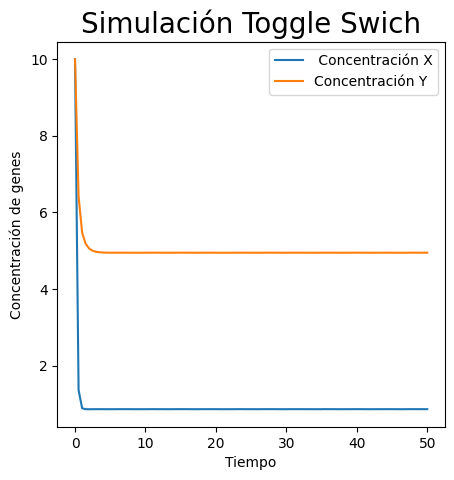

In [47]:
a1 = new_predictions[0,0]
a2 = new_predictions[0,1]
b1 = new_predictions[0,2]
b2 = new_predictions[0,3]
d1 = new_predictions[0,4]
d2 = new_predictions[0,5]
n = new_predictions[0,6]
 
def f(t, y):

    # asignar a cada ODE a un elemento de vector
    X = y[0]
    Y = y[1]

    # definimos cada ODE
    dX_dt = a1/(1+Y**n)-d1*X+b1
    dY_dt = a2/(1+X**n)-d2*Y+b1

    return [dX_dt, dY_dt]

# Declaramos el vector de tiempo
t_span = [0, 5]
times = np.linspace(t_span[0], t_span[1], 100)

# Definimos las condiciones iniciales
y0 = np.array([10,10])

# Resolvemos
# Modificar manualmente el intervalo de tiempo
sol = solve_ivp(f, t_span, y0, t_eval=times)
# sol=solve_ivp(f, t_span, y0) #Dejar que la librería elija el mejor intervalo
tiempo = sol.t
var1 = sol.y[0]
var2 = sol.y[1]

# Graficamos
plt.figure(figsize=(5, 5))
plt.plot(tiempo, var1, label=" Concentración X")
plt.plot(tiempo, var2, label="Concentración Y")
plt.xlabel('Tiempo')
plt.ylabel('Concentración de genes')
plt.title('Simulación Toggle Swich', fontsize=20)
plt.legend()
plt.show()